**Amplitude Modulation with 2 Baseband Signals + Demodulation**

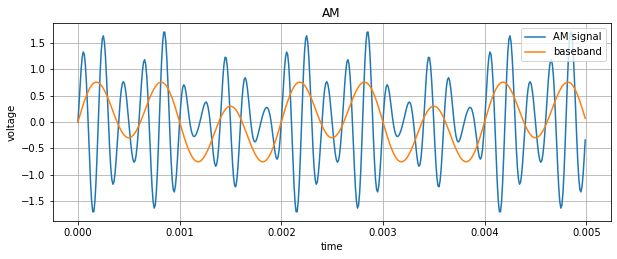

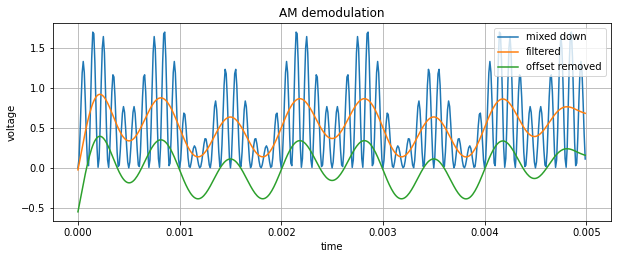

In [49]:
# Amplitude Modulation (AM) demodulation
import numpy as np
import scipy.signal as sp
import scipy.signal as signal
import matplotlib.pyplot as plt


fs = 96000  # sample rate 100 kHz
Ts = 1 / fs  # time step
Tmax = 0.005
t = np.arange(0, Tmax, Ts)  # time vector start / step / end


# carrier
fc = 5000
uc = np.sin(2 * np.pi * fc * t)

# baseband tone 1
m1 = 0.3
fb1 = 500
ub1 = m1 * np.sin(2 * np.pi * fb1 * t)

# baseband tone 2
m2 = 0.6
fb2 = 1500
ub2 = m2 * np.sin(2 * np.pi * fb2 * t)

# AM
uam = uc * (1 + ub1 + ub2)  # 1 = DC offset
 
# Plot Time Domain
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 1)  # 2 rows, 1 column, 1st row
plt.plot(t, uam, t, ub1 + ub2, antialiased=True)
plt.grid(True)
plt.title('AM')
plt.xlabel('time')
plt.ylabel('voltage')
plt.legend(['AM signal', 'baseband'])


# Demodulation
# Down mixing
udownmix = uam * uc

# Low pass filter
fc = 2000   # Cutoff frequency in Hz
order = 5   # Filter order

# Design Butterworth low-pass filter
b, a = signal.butter(order, fc / (fs / 2), btype='low', analog=False)
# Apply the filter
udemod = signal.filtfilt(b, a, udownmix)

# Offset removed
ub = udemod - np.mean(udemod)


# Plot Time Domain
plt.figure(figsize=(10, 8))
plt.subplot(2, 1, 2)  # 2 rows, 1 column, 1st row
plt.plot(t, udownmix, t, udemod, t, ub)
plt.grid(True)
plt.title('AM demodulation')
plt.xlabel('time')
plt.ylabel('voltage')
plt.legend(['mixed down', 'filtered', 'offset removed'])

plt.show()

